In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]
df = pd.read_csv(url, names=column_names)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('target', axis=1)
y = df['target']


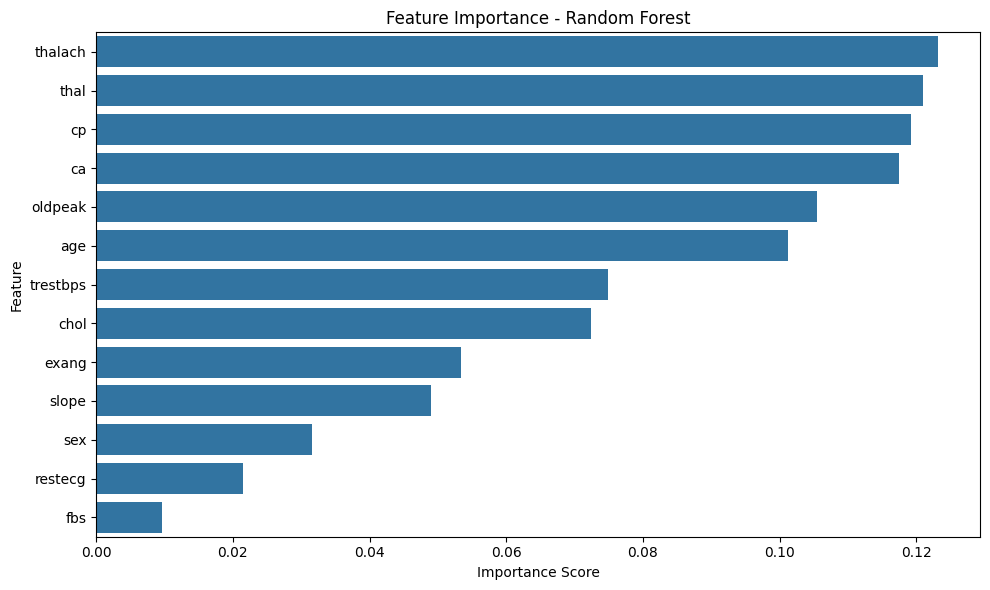

In [3]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature Importance
importances = rf.feature_importances_
features = X.columns

# Plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [4]:
# Use Logistic Regression for RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print("Selected Features by RFE:")
print(list(rfe_features))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features by RFE:
['sex', 'cp', 'fbs', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [5]:
# Use MinMaxScaler for Chi-Square (non-negative required)
X_scaled = MinMaxScaler().fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=8)
chi2_selector.fit(X_scaled, y)

chi2_features = X.columns[chi2_selector.get_support()]
print("Selected Features by Chi-Square Test:")
print(list(chi2_features))


Selected Features by Chi-Square Test:
['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [6]:
# Example: Intersection of RFE and Chi2
selected_features = set(rfe_features).intersection(set(chi2_features))
print("Final Selected Features (Intersection):", selected_features)

# OR: Union if you want broader set
# selected_features = set(rfe_features).union(set(chi2_features))


Final Selected Features (Intersection): {'slope', 'exang', 'ca', 'thal', 'sex', 'oldpeak', 'cp'}
